In [5]:
#Q 1---
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

data = pd.read_csv('Wholesale customers data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


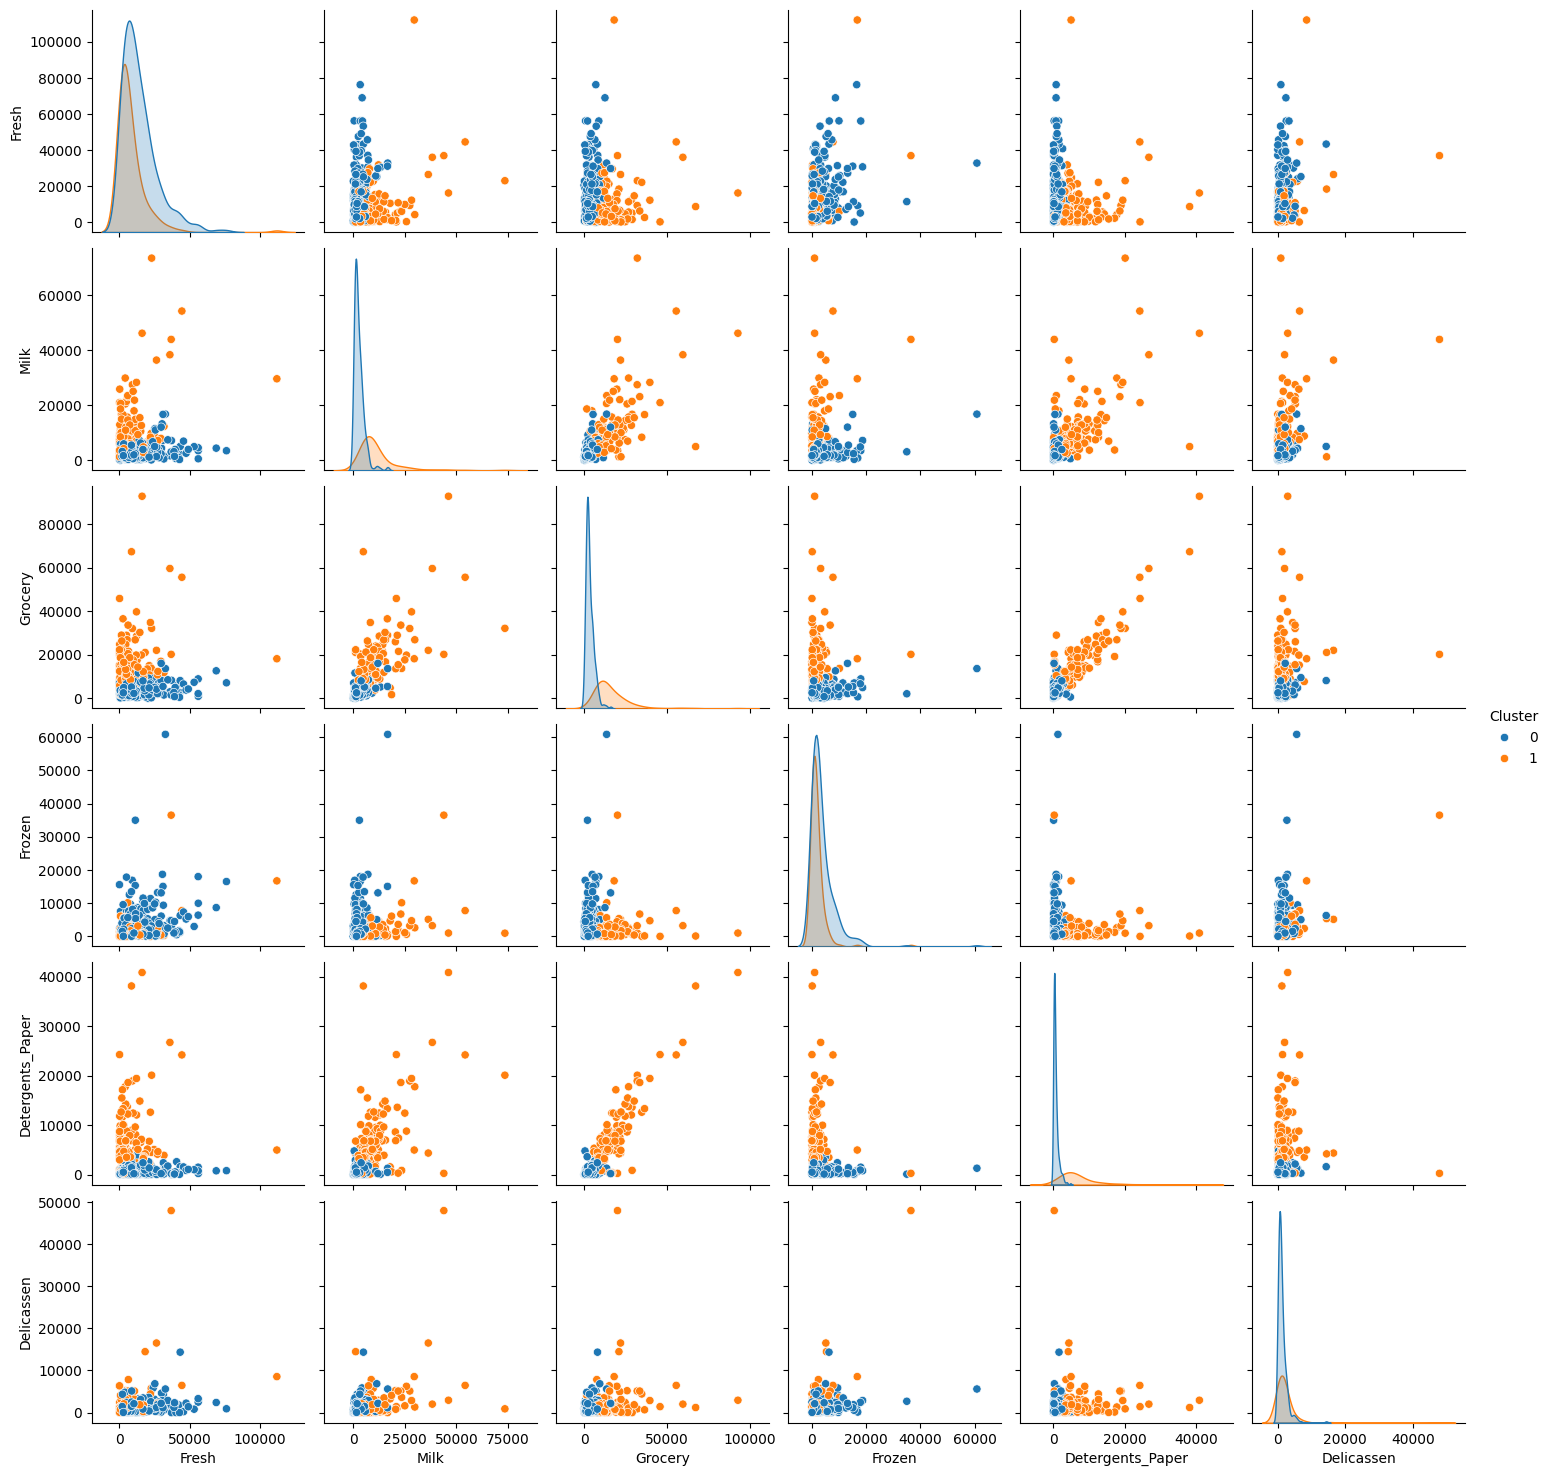

In [9]:


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means with the optimal number of clusters (from the Elbow Method)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=2)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(data, hue='Cluster', palette='tab10')
plt.show()

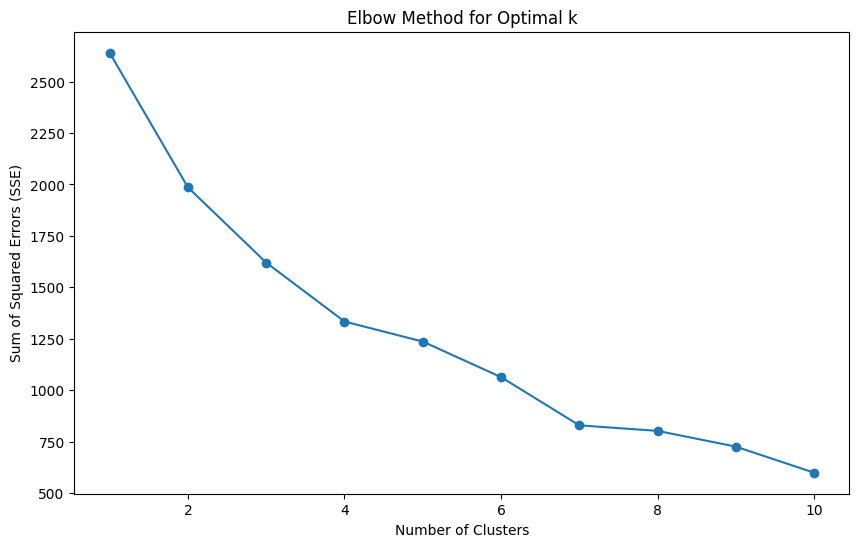

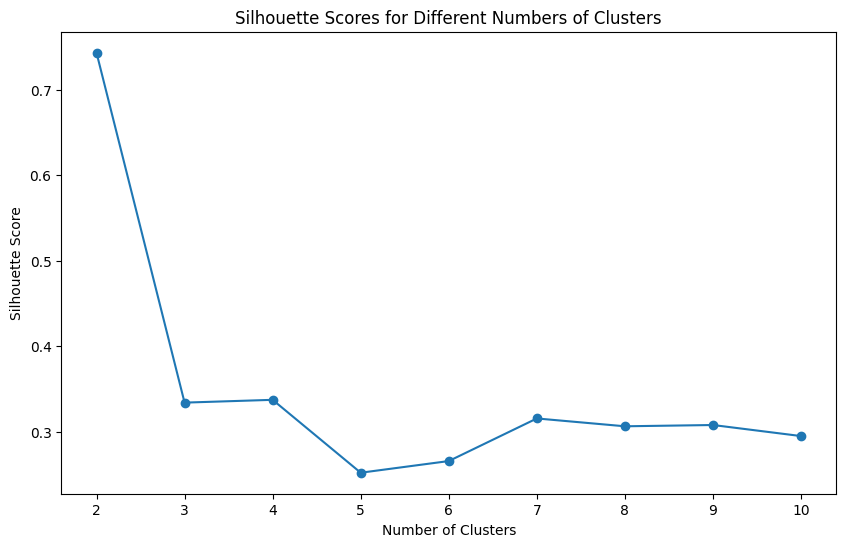

Optimal number of clusters based on Silhouette Score: 2


In [7]:
#Q 2--


# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    preds = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, preds)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

optimal_k_silhouette = range(2, 11)[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}')

In [ ]:
#Q 3--

Cluster 0: This cluster represents customers with diverse spending habits, particularly with high 
variability in the Fresh and Frozen categories. They have moderate spending in Milk, Grocery
Detergents_Paper, and Delicassen categories.
    
Cluster 1: This cluster consists of customers who tend to spend more on Milk, Grocery, 
and Detergents_Paper, indicating they might be more focused on these everyday products. 
They have moderate spending in other categories.

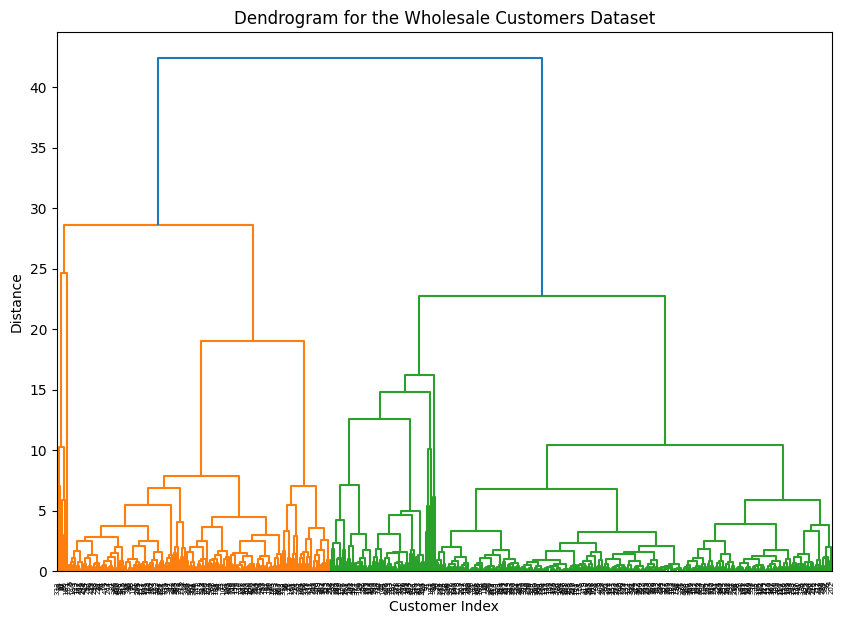

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [10]:
# Q 4--

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(data_scaled, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for the Wholesale Customers Dataset')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg_cluster_labels = agg_cluster.fit_predict(data_scaled)

kmeans = KMeans(n_clusters=2, random_state=2)
kmeans_labels = kmeans.fit_predict(data_scaled)


data['Agglomerative Cluster'] = agg_cluster_labels
data['KMeans Cluster'] = kmeans_labels

print(data.groupby('Agglomerative Cluster').mean())
print(data.groupby('KMeans Cluster').mean())